In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
veri=pd.read_csv("./veri_setleri/egitim.csv")#28x28lik pikseller
veri.shape

(42000, 785)

In [4]:
veri=veri[(veri["label"]==0)|(veri["label"]==1)]
veri.shape

(8816, 785)

In [5]:
y_veri=veri["label"]
X_veri=veri.drop(["label"],axis=1)
X_veri.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
resim_boyutu=int(np.sqrt(X_veri.shape[1]))
resim_boyutu

28

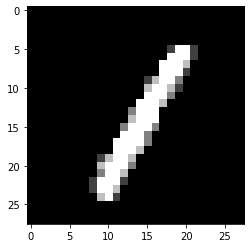

In [7]:
resim1=X_veri.iloc[7300].values
resim1=resim1.reshape((resim_boyutu,resim_boyutu))
plt.imshow(resim1,cmap="gray")
plt.show()

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_veri,y_veri,test_size=0.15,random_state=22)

In [9]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # ysa kütüphane ilklendirme
from keras.layers import Dense # ysa katman

2021-11-27 11:23:38.324182: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-27 11:23:38.324265: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
def SiniflandiriciMethod():
    siniflandirici=Sequential()
    siniflandirici.add(Dense(units=8,kernel_initializer="uniform",activation="relu",input_dim=X_train.shape[1]))
    siniflandirici.add(Dense(units=4,kernel_initializer="uniform",activation="relu"))
    siniflandirici.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))
    siniflandirici.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    return siniflandirici

In [16]:
ysa=KerasClassifier(build_fn=SiniflandiriciMethod,epochs=64)
dogruluk=cross_val_score(estimator=ysa,X=X_train,y=y_train,cv=3)
ortalama=dogruluk.mean()
std_s=dogruluk.std()
print(f"Doğruluk ortalama={ortalama}\nStandart sapma ortalama={std_s}")

Epoch 1/64
157/157 [==============================] - 1s 2ms/step - loss: 0.0645 - accuracy: 0.9872
Epoch 2/64
157/157 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9986
Epoch 3/64
157/157 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9988
Epoch 4/64
157/157 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.9996
Epoch 5/64
157/157 [==============================] - 0s 2ms/step - loss: 6.3988e-04 - accuracy: 0.9998
Epoch 6/64
157/157 [==============================] - 1s 4ms/step - loss: 3.3415e-04 - accuracy: 1.0000
Epoch 7/64
157/157 [==============================] - 0s 3ms/step - loss: 1.2272e-04 - accuracy: 1.0000
Epoch 8/64
157/157 [==============================] - 0s 3ms/step - loss: 8.2557e-05 - accuracy: 1.0000
Epoch 9/64
157/157 [==============================] - 0s 3ms/step - loss: 6.3128e-05 - accuracy: 1.0000
Epoch 10/64
157/157 [==============================] - 0s 3ms/step - loss: 5.050

**Epoch 64/64**
157/157 [==============================] - 0s 1ms/step - loss: 6.4451e-08 - accuracy: 1.0000
79/79 [==============================] - 0s 802us/step - loss: 0.0132 - accuracy: 0.9984
Doğruluk ortalama=**0.9991991519927979**
Standart sapma ortalama=**0.0005664536439864158**

**Epoch 2/2**
157/157 [==============================] - 0s 1ms/step - loss: 0.3101 - accuracy: 0.9996
79/79 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.9968
Doğruluk ortalama=**0.9982648293177286**
Standart sapma ortalama=**0.0010513060918622412**